In [ ]:
import geopandas as gpd 
import pandas as pd 
import numpy as np


In [2]:
bc = pd.read_csv('../../processing/bc_avg.csv').dropna()
replanted = pd.read_csv('../../processing/disturbances_planted.csv').dropna()
harvest = pd.read_csv('../../processing/harvest_not_planted.csv').dropna()
fire = pd.read_csv('../../processing/fire_not_planted.csv').dropna()

In [64]:
def make_date(df): 
    df['date'] = pd.to_datetime(df['date'])
    return df

def days_after(df, ref_shp, shp_id):
    shp = gpd.read_file(ref_shp)
    shp['effective_date'] = pd.to_datetime(shp['raster_val'].astype(int) + 1, format='%Y')
    ndvi_effected = df.set_index('ID').merge(shp.set_index(shp_id), left_index=True, right_index=True).drop('geometry', axis=1)
    ndvi_effected['time_delta'] = pd.to_datetime(ndvi_effected['date']) - ndvi_effected['effective_date']
    return ndvi_effected.reset_index()

In [4]:
shp = gpd.read_file(r'C:\dev\GIS-270\processing\fire_not_planted_uid\fire_not_planted_uid.shp')
shp

,raster_val,ID,geometry
0,2019.0,0,"POLYGON ((291785.052 1717118.746, 291812.067 1..."
1,2014.0,1,"POLYGON ((313087.865 1724064.163, 313141.929 1..."
2,2011.0,2,"POLYGON ((313972.263 1722861.203, 313999.295 1..."
3,2005.0,3,"POLYGON ((320157.825 1725148.343, 320350.129 1..."
4,2016.0,4,"POLYGON ((315015.957 1721499.567, 315166.157 1..."
...,...,...,...
48012,2018.0,48012,"POLYGON ((1860489.373 519200.326, 1860542.989 ..."
48013,2019.0,48013,"POLYGON ((1865509.712 520124.524, 1865576.882 ..."
48014,2019.0,48014,"POLYGON ((1860701.4 516856.021, 1860755.013 51..."
48015,2018.0,48015,"POLYGON ((1866715.71 517745.114, 1866769.327 5..."


In [19]:


shp['effective_date'] = pd.to_datetime(shp['raster_val'].astype(int) + 1, format='%Y')

In [22]:
shp = shp.drop('date', axis=1)

In [26]:
shp.set_index('ID')

,raster_val,geometry,effective_date
ID,,,
0,2019.0,"POLYGON ((291785.052 1717118.746, 291812.067 1...",2020-01-01
1,2014.0,"POLYGON ((313087.865 1724064.163, 313141.929 1...",2015-01-01
2,2011.0,"POLYGON ((313972.263 1722861.203, 313999.295 1...",2012-01-01
3,2005.0,"POLYGON ((320157.825 1725148.343, 320350.129 1...",2006-01-01
4,2016.0,"POLYGON ((315015.957 1721499.567, 315166.157 1...",2017-01-01
...,...,...,...
48012,2018.0,"POLYGON ((1860489.373 519200.326, 1860542.989 ...",2019-01-01
48013,2019.0,"POLYGON ((1865509.712 520124.524, 1865576.882 ...",2020-01-01
48014,2019.0,"POLYGON ((1860701.4 516856.021, 1860755.013 51...",2020-01-01


In [43]:
ndvi_effected = fire.set_index('ID').merge(shp.set_index('ID'), left_index=True, right_index=True).drop('geometry', axis=1)

In [60]:
ndvi_effected['time_delta'] = pd.to_datetime(ndvi_effected['date']) - ndvi_effected['effective_date']
ndvi_effected

,Unnamed: 0,MinValue,MaxValue,MeanValue,MedianValue,StdevValue,CountValue,date,raster_val,effective_date,time_delta
ID,,,,,,,,,,,
0,0,0.000000,1.000000,0.499725,0.509540,0.182870,845163.0,2003-03-17,2019.0,2020-01-01,-6134 days
12781,4910,0.695252,0.827312,0.761282,0.761282,0.093380,2.0,2003-03-17,2014.0,2015-01-01,-4308 days
12896,4952,0.365195,0.502820,0.434007,0.434007,0.097315,2.0,2003-03-17,2014.0,2015-01-01,-4308 days
13270,5082,0.406467,0.620285,0.513376,0.513376,0.151191,2.0,2003-03-17,2010.0,2011-01-01,-2847 days
14825,5702,0.333594,0.560650,0.435724,0.412927,0.115232,3.0,2003-03-17,2006.0,2007-01-01,-1386 days
...,...,...,...,...,...,...,...,...,...,...,...
47768,19312,0.347498,0.363873,0.357323,0.363873,0.008969,5.0,2024-10-28,2018.0,2019-01-01,2127 days
47778,19318,0.126918,0.498056,0.322896,0.308866,0.084353,32.0,2024-10-28,2018.0,2019-01-01,2127 days
47824,19336,0.047051,0.657431,0.316831,0.313200,0.245113,6.0,2024-10-28,2013.0,2014-01-01,3953 days


,ID,Unnamed: 0,MinValue,MaxValue,MeanValue,MedianValue,StdevValue,CountValue,date,raster_val,effective_date,time_delta
0,0,0,0.000000,1.000000,0.499725,0.509540,0.182870,845163.0,2003-03-17,2019.0,2020-01-01,-6134 days
1,12781,4910,0.695252,0.827312,0.761282,0.761282,0.093380,2.0,2003-03-17,2014.0,2015-01-01,-4308 days
2,12896,4952,0.365195,0.502820,0.434007,0.434007,0.097315,2.0,2003-03-17,2014.0,2015-01-01,-4308 days
3,13270,5082,0.406467,0.620285,0.513376,0.513376,0.151191,2.0,2003-03-17,2010.0,2011-01-01,-2847 days
4,14825,5702,0.333594,0.560650,0.435724,0.412927,0.115232,3.0,2003-03-17,2006.0,2007-01-01,-1386 days
...,...,...,...,...,...,...,...,...,...,...,...,...
1136174,47768,19312,0.347498,0.363873,0.357323,0.363873,0.008969,5.0,2024-10-28,2018.0,2019-01-01,2127 days
1136175,47778,19318,0.126918,0.498056,0.322896,0.308866,0.084353,32.0,2024-10-28,2018.0,2019-01-01,2127 days
1136176,47824,19336,0.047051,0.657431,0.316831,0.313200,0.245113,6.0,2024-10-28,2013.0,2014-01-01,3953 days
1136177,47960,19389,0.425611,0.537915,0.481763,0.481763,0.079411,2.0,2024-10-28,2008.0,2009-01-01,5779 days


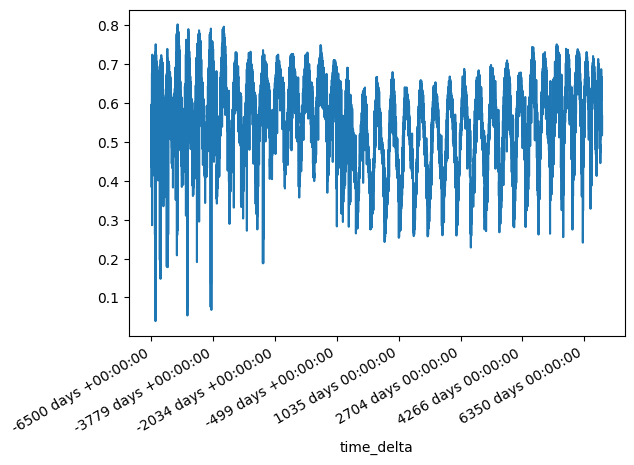

In [ ]:
from datetime import timedelta
from unicodedata import numeric


ndvi_effected.groupby('time_delta').mean(numeric_only=True)['MedianValue'].plot()
days_after(fire, r'C:\dev\GIS-270\processing\fire_not_planted_uid\fire_not_planted_uid.shp', 'ID').groupby('time_delta').mean(numeric_only=True)['MedianValue'].plot()

<Axes: xlabel='time_delta'>

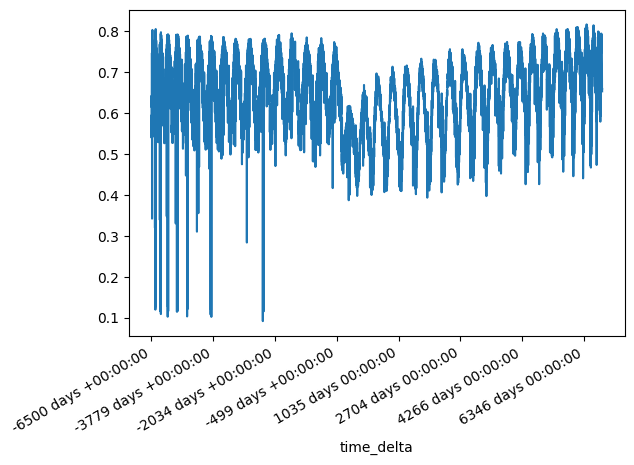

In [66]:
days_after(harvest, r'C:\dev\GIS-270\processing\harvest_not_planted_uid\harvest_not_planted_uid.shp', 'ID').groupby('time_delta').mean(numeric_only=True)['MedianValue'].plot()

<Axes: xlabel='time_delta'>

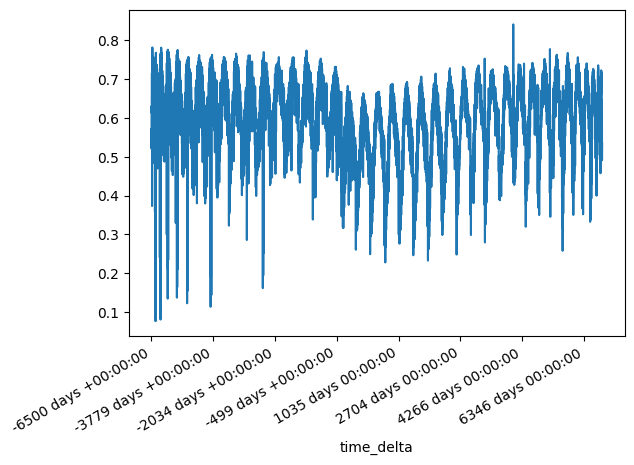

In [65]:
days_after(replanted, r'C:\dev\GIS-270\disturbances_planted\disturbances_planted.gdb', 'ACTIVITY_TREATMENT_UNIT_ID').groupby('time_delta').mean(numeric_only=True)['MedianValue'].plot()